# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
os.getcwd()

'c:\\Users\\GPSchool\\Documents\\BootCamp\\Git_Repositories\\Python-API-Challenge\\starter_code'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
remove_cities= []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
lat2 = []
lng2 = []
date =[]
city = "London"

x=1
y=0
dummy = cities
for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(query_url).json()
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat2.append(response['coord']['lat'])
        lng2.append(response['coord']['lon'])
        print(f"processing request {x} | {city}")
        x+=1
        previous = city
    except:
        print("city not found, skipping.....")
        remove_cities.append(city)
        y+=1
#pprint(response)





overde
processing request 22 | albany
processing request 23 | tessalit
city not found, skipping.....
processing request 24 | fort nelson
processing request 25 | mackay
processing request 26 | nemuro
processing request 27 | vaini
processing request 28 | ostrovnoy
processing request 29 | pula
processing request 30 | avarua
processing request 31 | gamba
processing request 32 | saint-pierre
processing request 33 | pemba
processing request 34 | harper
processing request 35 | lagunas
processing request 36 | kysyl-syr
processing request 37 | punta arenas
processing request 38 | ponta do sol
processing request 39 | djibo
processing request 40 | mataura
processing request 41 | polovinnoye
processing request 42 | mazatan
processing request 43 | srostki
processing request 44 | alofi
city not found, skipping.....
processing request 45 | hilo
processing request 46 | kapaa
processing request 47 | puerto madryn
processing request 48 | ushuaia
processing request 49 | atuona
processing request 50 | iqa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:

try:
    for city in remove_cities:
        cities.remove(city)
except:
    print('Already removed cities')

weather_summary_df = pd.DataFrame({
                         'City':cities,
                         'lats':lat2,
                         'lngs':lng2,
                         'Max Temp':max_temp,
                         'Humidity':humidity,
                         'Cloudiness':cloudiness,
                         'Wind Speed':wind_speed,
                         'Country':country,
                         'Date':date})


weather_summary_df.head()
weather_summary_df.to_csv('../output_data/hw_cities_output.csv')



Already removed cities


In [18]:
weather_summary_df.describe()

,lats,lngs,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.196663,24.598917,69.276281,68.270463,55.491103,7.412527,1.624470e+09
std,33.543173,90.560109,14.357849,20.333796,36.228884,5.145329,8.972104e+01
min,-54.800000,-175.200000,34.990000,6.000000,0.000000,0.000000,1.624470e+09
25%,-7.863325,-57.112425,59.000000,56.000000,20.000000,3.612500,1.624470e+09
50%,22.426100,26.702650,71.195000,72.000000,63.000000,6.380000,1.624470e+09
75%,49.185600,107.177600,79.232500,84.000000,90.000000,9.945000,1.624470e+09
max,78.218600,178.416700,105.210000,100.000000,100.000000,28.790000,1.624470e+09


In [20]:
# Max value in the humidity column shows that there are no cities over 100% humidity

,City,lats,lngs,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [21]:

weather_summary_df.describe()

,lats,lngs,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.196663,24.598917,69.276281,68.270463,55.491103,7.412527,1.624470e+09
std,33.543173,90.560109,14.357849,20.333796,36.228884,5.145329,8.972104e+01
min,-54.800000,-175.200000,34.990000,6.000000,0.000000,0.000000,1.624470e+09
25%,-7.863325,-57.112425,59.000000,56.000000,20.000000,3.612500,1.624470e+09
50%,22.426100,26.702650,71.195000,72.000000,63.000000,6.380000,1.624470e+09
75%,49.185600,107.177600,79.232500,84.000000,90.000000,9.945000,1.624470e+09
max,78.218600,178.416700,105.210000,100.000000,100.000000,28.790000,1.624470e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

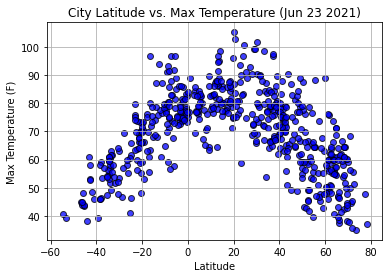

In [79]:
todays_date = time.ctime(weather_summary_df['Date'][0])
x_axis = weather_summary_df['lats']
y_axis = weather_summary_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plot_date = todays_date[4:-14]
plot_year = todays_date[-4:]
plt.title(f"City Latitude vs. Max Temperature ({plot_date} {plot_year})")
plt.savefig('../output_data/figure_1.png')


## Latitude vs. Humidity Plot

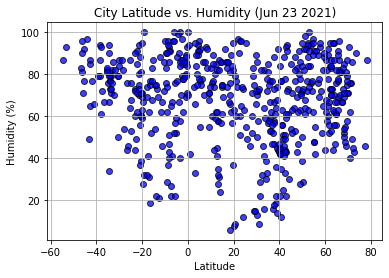

In [65]:
x_axis = weather_summary_df['lats']
y_axis = weather_summary_df['Humidity']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({plot_date} {plot_year})")
plt.grid()
plt.savefig('../output_data/figure_2.png')

## Latitude vs. Cloudiness Plot

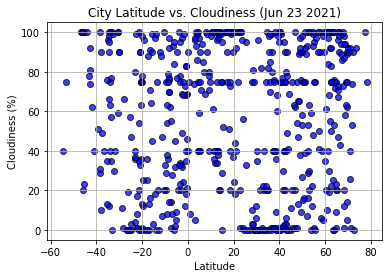

In [66]:
x_axis = weather_summary_df['lats']
y_axis = weather_summary_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({plot_date} {plot_year})")
plt.grid()
plt.savefig('../output_data/figure_3.png')

## Latitude vs. Wind Speed Plot

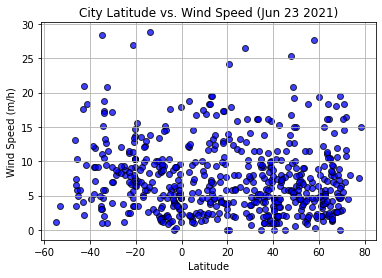

In [67]:
x_axis = weather_summary_df['lats']
y_axis = weather_summary_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/h)')
plt.title(f"City Latitude vs. Wind Speed ({plot_date} {plot_year})")
plt.grid()
plt.savefig('../output_data/figure_4.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7062634101374486


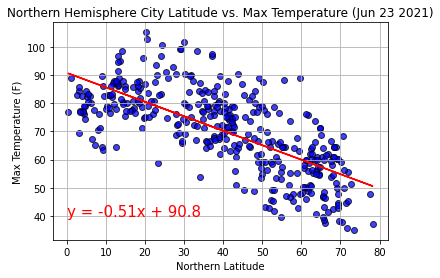

In [89]:
northern_hem_df = weather_summary_df.loc[(weather_summary_df['lats'] > 0 ),:]
x_axis = northern_hem_df['lats']
y_axis = northern_hem_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,40),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig('../output_data/figure_5.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8127638889782829


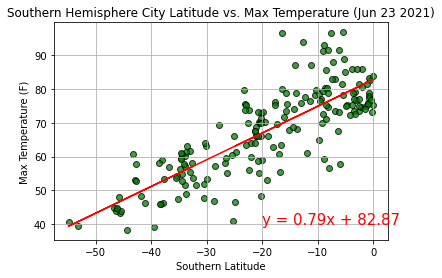

In [94]:
southern_hem_df = weather_summary_df.loc[(weather_summary_df['lats'] < 0 ),:]
x_axis = southern_hem_df['lats']
y_axis = southern_hem_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "green", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig('../output_data/figure_9.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05059130252289961


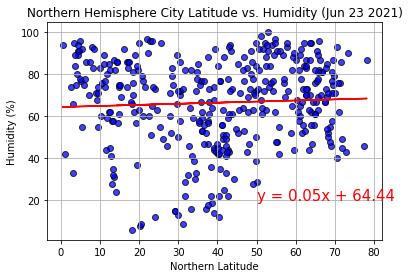

In [90]:
x_axis = northern_hem_df['lats']
y_axis = northern_hem_df['Humidity']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Humidity ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(50,20),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig('../output_data/figure_6.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.09618176365544154


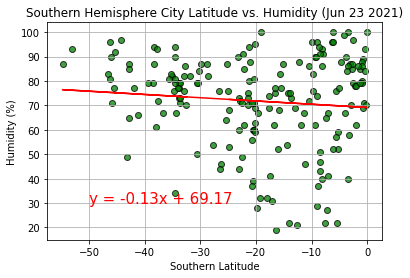

In [97]:
x_axis = southern_hem_df['lats']
y_axis = southern_hem_df['Humidity']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "green", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Humidity ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig('../output_data/figure_10.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.04377890877719466


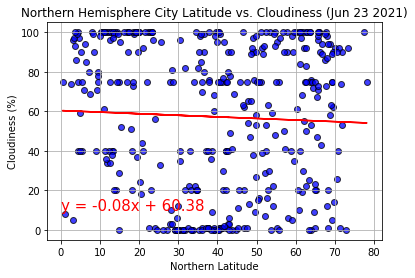

In [91]:
x_axis = northern_hem_df['lats']
y_axis = northern_hem_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig('../output_data/figure_7.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.12917090866809414


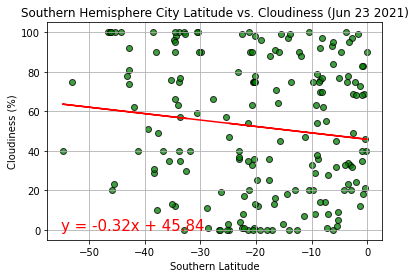

In [103]:
x_axis = southern_hem_df['lats']
y_axis = southern_hem_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "green", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-55,0),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig('../output_data/figure_11.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.03878201939480081


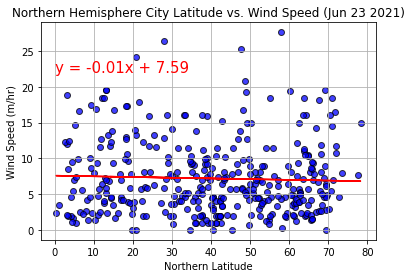

In [108]:
x_axis = northern_hem_df['lats']
y_axis = northern_hem_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed (m/hr)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,22),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig('../output_data/figure_8.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20389800045754272


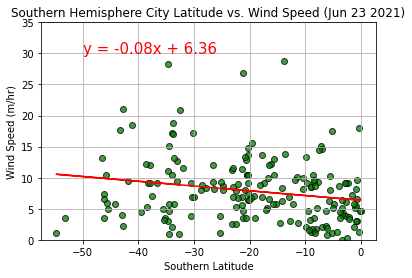

In [107]:
x_axis = southern_hem_df['lats']
y_axis = southern_hem_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "green", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed (m/hr)')
plt.ylim(0,35)
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig('../output_data/figure_12.png')